# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
import time

In [2]:
start_time = time.time()

## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [37]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [39]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

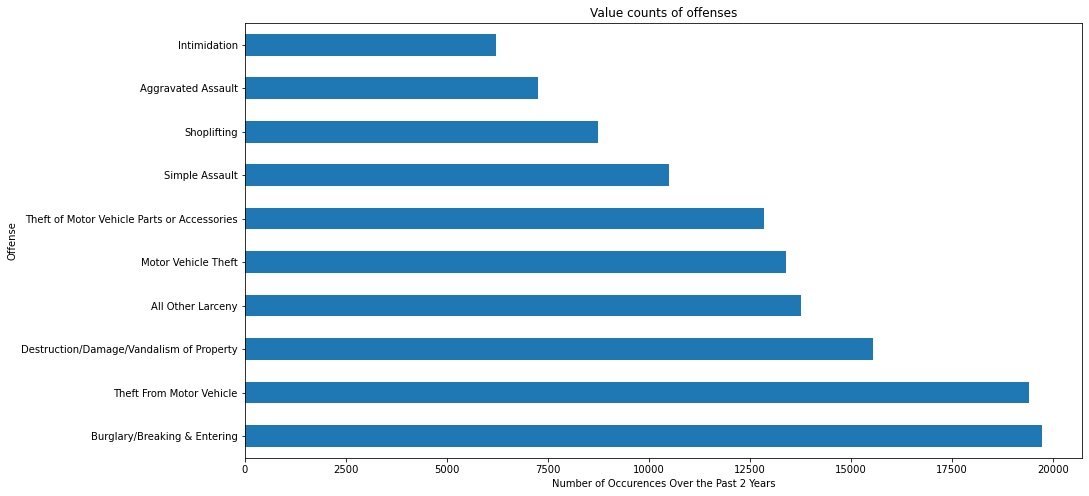

In [40]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [41]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [42]:
#Initializing our model
#InitialModel = LogisticRegression(multi_class='ovr', random_state= 1)

Now we'll fit our model

In [43]:
#InitialModel.fit(X_train, y_train)

In [44]:
#y_train_pred = InitialModel.predict(X_train)
#y_test_pred = InitialModel.predict(X_test)

In [45]:
#print(classification_report(y_train, y_train_pred))

In [46]:
#print(classification_report(y_test, y_test_pred))

Now it's time to initialize our model

## Random Forest Model ##

In [47]:
rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [48]:
print(classification_report(y_train, rf_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.43      0.37      0.40     14827
                          All Other Larceny       0.21      0.17      0.19     14827
               Burglary/Breaking & Entering       0.25      0.38      0.30     14827
   Destruction/Damage/Vandalism of Property       0.27      0.08      0.13     14827
                               Intimidation       0.42      0.56      0.48     14827
                        Motor Vehicle Theft       0.23      0.26      0.24     14827
                                Shoplifting       0.27      0.73      0.40     14827
                             Simple Assault       0.40      0.32      0.36     14827
                   Theft From Motor Vehicle       0.28      0.05      0.09     14827
Theft of Motor Vehicle Parts or Accessories       0.25      0.07      0.12     14827

                                   accuracy                    

In [49]:
print(classification_report(y_test, rf_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.37      0.33      0.35      1840
                          All Other Larceny       0.19      0.17      0.18      3412
               Burglary/Breaking & Entering       0.29      0.37      0.32      4895
   Destruction/Damage/Vandalism of Property       0.24      0.07      0.11      3862
                               Intimidation       0.33      0.54      0.41      1559
                        Motor Vehicle Theft       0.18      0.24      0.21      3344
                                Shoplifting       0.17      0.72      0.28      2163
                             Simple Assault       0.48      0.33      0.39      2611
                   Theft From Motor Vehicle       0.31      0.05      0.09      4895
Theft of Motor Vehicle Parts or Accessories       0.20      0.07      0.11      3265

                                   accuracy                    

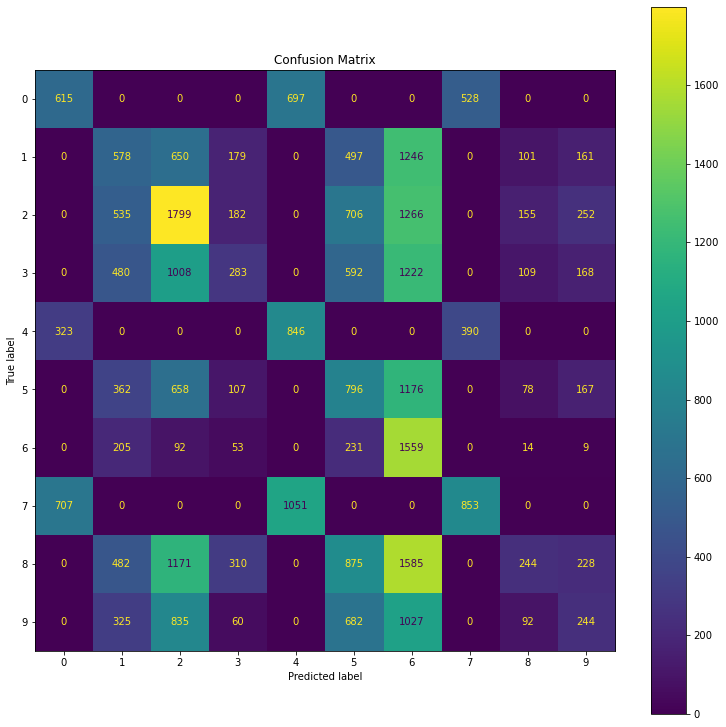

In [50]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

cm = confusion_matrix(y_test, rf_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 615 crimes were correctly predicted as being "aggravated assault" crimes
* 1,225 crimes were wrongly predicted as not being "aggravated assault" crimes
* 1,030 crimes were wrongly predicted as being "aggravated assault" crimes
* 28,976 crimes were correctly predicted as not being "aggravated assault" crimes

**1) All Other Larceny**

* 578 crimes were correctly predicted as being "all other larceny" crimes
* 2,834 crimes were wrongly predicted as not being "all other larceny" crimes
* 2,389 crimes were wrongly precicted as being "all other larceny" crimes
* 26,045 crimes were correctly predicted as not being "all other larceny" crimes

**2) Burglary/Breaking & Entering**

* 1799 crimes were correctly predicted as being "burglary/breaking & entering" crimes
* 3,096 crimes were wrongly predicted as not being "burglary/breaking & entering" crimes
* 4,414 crimes were wrongly predicted as being "burglary/breaking & entering" crimes
* 23,722 crimes were correctly predicted as not being "burglary/breaking & entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 283 crimes were correctly predicted as being "destruction/damage/vandalism of property" crimes
* 3,579 crimes were wrongly predicted as not being "destruction/damage/vandalism of property" crimes
* 891 crimes were wrongly predicted as being "destruction/damage/vandalism of property" crimes
* 28,942 crimes were correctly predicted as not being "destruction/damage/vandalism of property" crimes

**4) Intimidation**

* 846 crimes were correctly predicted as being "intimidation" crimes
* 713 crimes were wrongly predicted as not being "intimidation" crimes
* 1,748 crimes were wrongly predicted as being "intimidation" crimes
* 29, 559 crimes were correctly predicted as not being "intimidation" crimes

**5) Motor Vehicle Theft**

* 796 crimes were correctly predicted as being "motor vehicle theft" crimes
* 2,548 crimes were wrongly predicted as not being "motor vehicle theft" crimes
* 3,583 crimes were wrongly predicted as being "motor vehicle theft" crimes
* 27,841 crimes were correctly predicted as not being "motor vehicle theft" crimes

**6) Shoplifting**

* 1559 crimes were correctly predicted as being "shoplifting" crimes
* 424 crimes were wrongly predicted as not being "shoplifting" crimes
* 7,522 crimes were wrongly predicted as being "shoplifting" crimes
* 27,652 crimes were correctly predicted as not being "shoplifting" crimes

**7) Simple Assault**

* 853 crimes were correctly predicted as being "simple assault" crimes
* 1,758 crimes were wrongly predicted as not being "simple assault" crimes
* 918 crimes were wrongly predicted as being "simple assault" crimes
* 30,993 crimes were correctly predicted as not being "simple assault" crimes

**8) Theft From Motor Vehicle**

* 244 crimes were correctly predicted as being "theft from motor vehicle" crimes
* 4,651 crimes were wrongly predicted as not being "theft from motor vehicle" crimes
* 549 crimes were wrongly predicted as being "theft from motor vehicle" crimes
* 31,282 crimes were correctly predicted as not being "theft from motor vehicle" crimes

**9)  Theft of Motor Vehicle Parts or Accessories**

* 244 crimes were correctly predicted as being "theft of motor vehicle parts or accessories" crimes
* 3,021 crimes were wrongly predicted as not being "theft of motor vehicle parts or accessories" crimes
* 985 crimes were wrongly predicted as not being "theft of motor vehicle parts or accessories" crimes
* 26,966 crimes were correctly predicted as not being "theft of motor vehicle parts or accessories" crimes

### Crime Classification Report ###

## Random Forest Tuning ##

In [51]:
rf2 = RandomForestClassifier()

param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
    'min_samples_leaf': [0.1, 0.2, 0.3]
}


gs_rf = GridSearchCV(rf2, param_grid)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2,
 'random_state': 1}

In [52]:
#gs_forest_train_pred = gs_rf.predict(X_train)
#print(classification_report(y_train, gs_forest_train_pred))

In [53]:
#gs_forest_test_pred = gs_rf.predict(X_test)
#print(classification_report(y_test, gs_forest_test_pred))

In [54]:
rf3 = RandomForestClassifier()

param_grid2 = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [0.24, 0.25, 0.26],
    'min_samples_leaf': [0.1, 0.12, 0.13]
}


gs_rf2 = GridSearchCV(rf2, param_grid)
gs_rf2.fit(X_train, y_train)
gs_rf2.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2,
 'random_state': 1}

In [55]:
rf4 = RandomForestClassifier(criterion= "entropy", random_state = 1,  max_depth = 3, min_samples_split= 0.2, min_samples_leaf = 0.1,  )

rf4.fit(X_train, y_train)
rf_train_pred2 = rf4.predict(X_train)
rf_test_pred2 = rf4.predict(X_test)

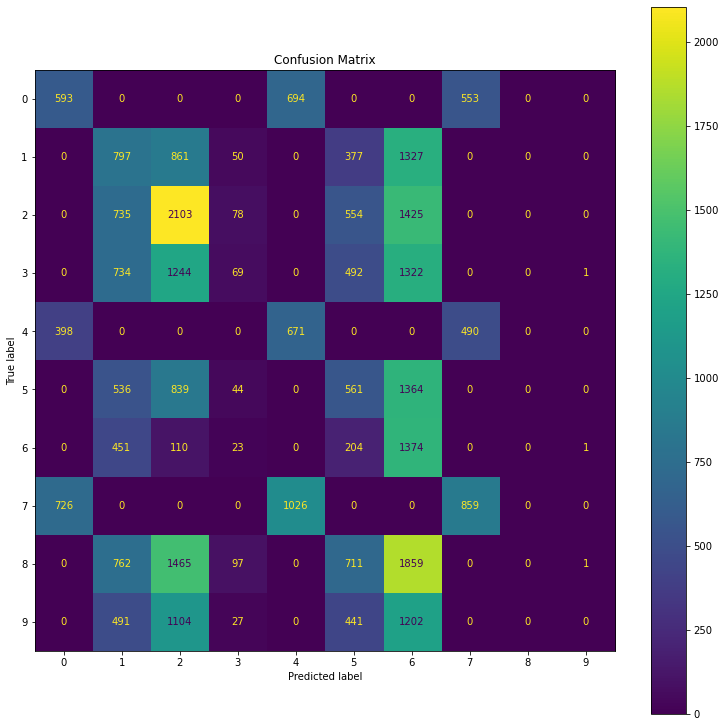

In [56]:
cm2 = confusion_matrix(y_test, rf_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

In [57]:
print(classification_report(y_train, rf_train_pred2))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.37      0.32      0.34     14827
                          All Other Larceny       0.19      0.24      0.21     14827
               Burglary/Breaking & Entering       0.23      0.44      0.30     14827
   Destruction/Damage/Vandalism of Property       0.18      0.02      0.03     14827
                               Intimidation       0.38      0.45      0.41     14827
                        Motor Vehicle Theft       0.20      0.18      0.19     14827
                                Shoplifting       0.23      0.65      0.34     14827
                             Simple Assault       0.35      0.34      0.35     14827
                   Theft From Motor Vehicle       0.00      0.00      0.00     14827
Theft of Motor Vehicle Parts or Accessories       0.11      0.00      0.00     14827

                                   accuracy                    

In [58]:
print(classification_report(y_test, rf_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.32      0.33      1840
                          All Other Larceny       0.18      0.23      0.20      3412
               Burglary/Breaking & Entering       0.27      0.43      0.33      4895
   Destruction/Damage/Vandalism of Property       0.18      0.02      0.03      3862
                               Intimidation       0.28      0.43      0.34      1559
                        Motor Vehicle Theft       0.17      0.17      0.17      3344
                                Shoplifting       0.14      0.64      0.23      2163
                             Simple Assault       0.45      0.33      0.38      2611
                   Theft From Motor Vehicle       0.00      0.00      0.00      4895
Theft of Motor Vehicle Parts or Accessories       0.00      0.00      0.00      3265

                                   accuracy                    

In [59]:
print ("My program took", time.time() - start_time, "to run")

My program took 2613.8911769390106 to run
